#Example Weibull - length fix

In [2]:
install.packages("survival")
install.packages("tidyverse")
install.packages("ggplot2")
devtools::install_github("dlsaavedra/rcens")

library(rcens)
library(survival)
library(tidyverse)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpUZlVKo/remotes1083a38a9db/dlsaavedra-rcens-53d874c/DESCRIPTION’ ... OK
* preparing ‘rcens’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘rcens_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#Cread Intervalar Data

In [3]:
Data = rcensIfix(rdistrX = rexp, interval_length = 2,
                   param_X = list("rate" = .5),
                   n = 1e02, theta = .9)


Censorship percentage: 0.9

# Plot Intervalar Censoring Data Fix length

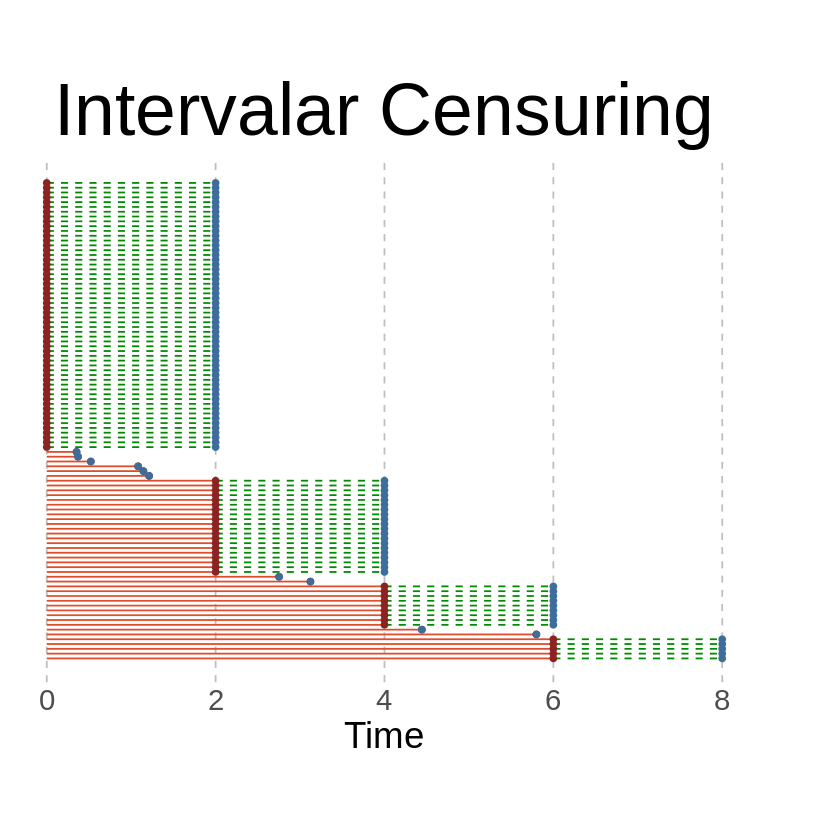

In [4]:


color_line = "#E14D2A"
color_point_i = "#8B2323"
color_point_f = "#3E6D9C"
color_pt = "#008B00"

A = data.frame(Data$sample_censored)
A  %>%
  select(Lower,Upper) %>%
  arrange( Lower , Upper) %>%
  mutate(inicio = 0,index = desc(row_number())) %>%
  ggplot() +
  geom_segment(aes(x=inicio,y=index,xend=Lower,yend=index),color=color_line)+
  geom_segment(aes(x=Lower,y=index,xend=Upper,yend=index),color=color_pt,linetype="dashed")+
  geom_point(aes(x=Lower,y=index),color=color_point_i)+
  geom_point(aes(x=Upper,y=index),color=color_point_f)+

  theme(
    plot.title = element_text(color="black", hjust = 0.5, size = rel(4)),
    plot.title.position = "panel",
    panel.background = element_rect(fill="transparent"),
    panel.grid.major.x = element_line(color="gray",linetype = "dashed"),
    axis.ticks.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text.x = element_text(size = rel(2)),
    axis.title.x = element_text(size = rel(2)),
    #legend.position      = c(1, 1),
    #legend.justification = c(1, 0),
    legend.text          = element_text(size = 1000),
    plot.margin          = unit(c(0.1, 0.1, 0.1, 0.01), "npc")
  )+
  labs(title="Intervalar Censuring")+
  xlab("Time")+
  scale_color_manual(values=c("H"= '#E14D2A', "F" = '#ff00ff'))

